In [1]:
import numpy as np
import time as tm

# Bucles for y while

El lenguaje `python` ofrece posibilidades suficientes como para poder escribir casi cualquier bucle como un bucle `for`, o `while`, a nuestra elección.

Sin embargo, es _muy conveniente_ que no usemos uno u otro indistintamente, sino que siempre intentemos usar cada uno para la tarea para la que fue concebido:

 - bucle `for` para recorrer un iterable. En casi todos los casos durante esta asignatura, ese iterable será una _lista o array de tamaño fijo_ que conocemos antes de empezar a iterar.
 - bucle `while` para métodos iterativos que repiten un cómputo hasta que se satisface el "criterio de parada".

### Ejemplo

Sumar los elementos de una lista al cuadrado.
 - Recorrer una lista, que es un iterable.
 - Conocemos el tamaño de la lista.
 - => lo adecuado es un bucle `for`

In [2]:
lista = np.arange(20)-7
N = len(lista)


In [3]:
suma = 0
for x in lista:
    suma += x**2
suma

790

In [4]:
# variante: recorremos los índices del array en vez de sus valores
# Mejor evitarlo, pero a veces es necesario :-/
lista = np.arange(20)-7
suma = 0
for i in range(N):
    suma += lista[i]**2
suma

790

In [5]:
# variante: lista por compresión
suma = sum(x**2 for x in lista)
suma

790

In [6]:
## INAPROPIADO, CON UN WHILE
i = 0
suma = 0
while i<N:
    suma += lista[i]**2
    i += 1
suma

790

### Si dudas, un bucle for es casi siempre mejor solución
 - Es fácil escribir un bucle while infinito
 - Es más difícil entender lo que hace un bucle while que ha escrito otra persona

## ¿Cuándo usar un bucle while?

Hay varios casos de uso de bucle while, pero para esta asignatura sólo hay uno:

 - métodos iterativos que repiten un cómputo hasta que se satisface el "criterio de parada".
 
### Ejemplo
Método babilonio para calcular raíces cuadradas:

 - OBJETIVO: Calcular la raíz cuadrada de `a`
 - INICIO: Nuestra aproximación inicial es burda, puede ser `x=1`, `x=a`, por ejemplo.
 - REPITE: Si `x` es una aproximación, entonces `(1/2)*x + (1/2)*(a/x)` es una aproximación mejor
 - HASTA QUE: Termina cuando la diferencia entre `x**2` y `a` es más pequeña que nuestra __tolerancia__ `epsilon`.

In [7]:
# OBJETIVO
a = 2
# INICIO
x = a
# TOLERANCIA
epsilon = 1e-6
# mientras no se cumpla el CRITERIO DE PARADA
while abs(x**2-a)>epsilon:
    # REPITE
    x = (1/2)*x + (1/2)*(a/x)

# El error cometido es menor que la tolerancia
print(x, x**2, abs(x**2-a))

1.4142135623746899 2.0000000000045106 4.510614104447086e-12


y empaquetado como una función para calcular raíces cuadradas

In [8]:
def raiz(a, # OBJETIVO: sqrt(a)
         epsilon = 1e-6 # TOLERANCIA
        ):
    # INICIO
    x = a
    # mientras no se cumpla el CRITERIO DE PARADA
    while abs(x**2-a)>epsilon:
        # REPITE
        x = (1/2)*x + (1/2)*(a/x)
    return x

# El error cometido es menor que la tolerancia
print(raiz(2), raiz(4))

1.4142135623746899 2.0000000929222947


#### Ejercicio: encuentra el número `x*` tal que `f(x*) = x*`

Definimos $f(x) = e^{-x}$.
Observando las gráficas de f(x) y de la función identidad `x->x` en el intervalo $[0,1]$, es claro que existe un número $0<x^*<1$ tal que `f(x*) = x*`.

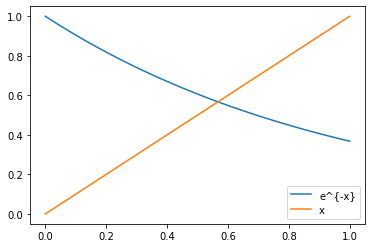

In [9]:
# Veremos más adelante el código para generar gráficas
#  (también está en la cheatsheet, éste es el tipo de gráfica más básica)
import matplotlib.pyplot as plt
xs = np.linspace(0,1,100)
ys = np.exp(-xs)
plt.plot(xs, ys, label='e^{-x}')
plt.plot(xs, xs, label='x')
plt.legend()

Para calcular este punto x*, vamos a usar el "método del punto fijo" (que no sirve para cualquier función, como veremos...):

 - OBJETIVO: Calcular x* tal que x* = exp(-x*)
 - IDEA: si aplicamos f muchas veces, tenemos `x*=f(f(f(... x...)))`, que se parece a `f(x*)=f(f(f(f(... x...))))`.
 - INICIO: Nuestra aproximación inicial es burda, puede ser x=1, x=0, por ejemplo.
 - REPITE: Si x es una aproximación, entonces `f(x)=exp(-x)` es una aproximación mejor.
 - HASTA QUE: Termina cuando la diferencia entre `x` y `exp(-x)` es más pequeña que nuestra tolerancia epsilon.


In [10]:
def f(x):
    return np.exp(-x)

def solucion(
    f, # OBJETIVO
    x0 = 1, #INICIO
    epsilon = 1e-6 # TOLERANCIA,
        ):
    # INICIO
    x = x0
    # CRITERIO DE PARADA
    while np.abs(x-f(x))>epsilon:
        # ITERACIÓN A REPETIR
        x = f(x)
    return x

# El error cometido debe ser menor que la tolerancia
x_ast = solucion(f)
print('x*=',x_ast, '; error=', f(x_ast) - x_ast)

x*= 0.5671437480994115 ; error= -7.172651695919185e-07


## Recorremos un iterable pero podemos terminar antes de recorrerlo entero: for ... break/return

En algunos casos _tenemos un iterable_, incluso sabemos su longitud, pero el bucle puede terminar antes de tiempo, así que _no sabemos cuántas veces se va a ejecutar el bucle_. En ese caso es conveniente usar un bucle for, más claro, y con garantías de no entrar en un bucle infinito, pero usar una instrucción `break` si podemos salir del bucle prematuramente. También puede servir una instrucción `return` si estamos dentro de una función que ya ha encontrado el resultado que buscaba.

### Ejemplo: decidir si un número es primo

Vamos a decidir si un número `n` es primo con la técnica más naive: probar a dividirlo por todos los números menores.

Primera versión con un bucle `for` pero sin `break`:

In [11]:
n = 1721492

In [12]:
# Usamos un booleano que comienza a True, pero le vamos a pasar toda las pruebas de divisibilidad
#  por números menores. Si pasa todas esas pruebas, es_primo seguirá siendo True. Si una o más de esas
#  de esas pruebas fallan, es_primo será False.
es_primo = True
for i in range(2,n):
    # si i es dividor de n
    if n%i==0:
        es_primo = False
print(n, 'es primo' if es_primo else 'es compuesto')

1721492 es compuesto


Misma tarea con un bucle while:

In [13]:
es_primo = True
i = 2
while i<n:
    # si i es dividor de n
    if n%i==0:
        es_primo = False
    i += 1
print(n, 'es primo' if es_primo else 'es compuesto')

1721492 es compuesto


Otro bucle while más eficiente. En cuanto encontramos un divisor, salimos del bucle. No nos iteresa conocer todos los divisores, simplemente averiguar si es primo...

In [14]:
i = 2
while (i<n) and (n%i==0):
    i += 1
if i==n:
    es_primo = True
else:
    es_primo = False
print(n, 'es primo' if es_primo else 'es compuesto')

1721492 es compuesto


Comparamos la velocidad

In [15]:
before = tm.time()
# Tu código aquí
es_primo = True
for i in range(2,n):
    # si i es dividor de n
    if n%i==0:
        es_primo = False
print(n, 'es primo' if es_primo else 'es compuesto')

after = tm.time()
print('versión lenta: ', after - before)


1721492 es compuesto
versión lenta:  0.1756281852722168


In [16]:
before = tm.time()
# Tu código aquí
i = 2
while (i<n) and (n%i==0):
    i += 1
if i==n:
    es_primo = True
else:
    es_primo = False
print(n, 'es primo' if es_primo else 'es compuesto')

after = tm.time()
print('versión alternativa: ', after - before)


1721492 es compuesto
versión alternativa:  0.0011382102966308594


### Ejercicio

 - Consigue el mismo resultado con el bucle `for` y una instrucción `break`.

In [17]:
# Usamos un booleano que comienza a True, pero le vamos a pasar toda las pruebas de divisibilidad
#  por números menores. Si pasa todas esas pruebas, es_primo seguirá siendo True. Si una o más de esas
#  de esas pruebas fallan, es_primo será False.
es_primo = True
for i in range(2,n):
    # si i es dividor de n
    if n%i==0:
        es_primo = False
        break
print(n, 'es primo' if es_primo else 'es compuesto')

1721492 es compuesto


In [18]:
before = tm.time()
# Tu código aquí
es_primo = True
for i in range(2,n):
    # si i es dividor de n
    if n%i==0:
        es_primo = False
print(n, 'es primo' if es_primo else 'es compuesto')

after = tm.time()
print('versión con break: ', after - before)

1721492 es compuesto
versión con break:  0.16464638710021973


### Ejercicios

 - Escribe código para calcular el factorial de un número `n` usando un bucle.

In [19]:
def factorial(n):
    prod = 1
    # range(1,n+1) recorre los números de 1 a n
    for k in range(1,n+1):
        prod = prod*k
    return prod

factorial(4)

24

In [21]:
def combinaciones(n,k):
    # // es la división entera, que devuelve un int
    return factorial(n)//(factorial(k)*factorial(n-k))

combinaciones(6,1), combinaciones(6,2)

(6, 15)